In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("California house prices.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# Handling null values by removing null columns.
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Checking if any duplicates exist in the entire DataFrame.
df.duplicated().any()

False

In [8]:
# Define a function to identify outliers using IQR with a larger multiplier.
def find_outliers(column, multiplier=3):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply the find_outliers function to numerical columns in the new DataFrame.
numerical_columns = df.select_dtypes(include=[np.number])
outliers = numerical_columns.apply(find_outliers, axis=0)

# Count the total number of outliers.
total_outliers = outliers.sum().sum()

# Print the total number of outliers.
print("Total number of outliers in the DataFrame:", total_outliers)

Total number of outliers in the DataFrame: 1911


In [9]:
# Define a function to identify and remove outliers using IQR.
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply the find_outliers function to numerical columns
numerical_columns = df.select_dtypes(include=[np.number])
outliers = numerical_columns.apply(find_outliers, axis=0)

# Create a DataFrame without outliers
df1 = df[~outliers.any(axis=1)]

# Print the new DataFrame without outliers
print("DataFrame without outliers!")
print(df1)

DataFrame without outliers!
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  hous

In [10]:
# Define a function to identify outliers using IQR with a larger multiplier.
def find_outliers(column, multiplier=3):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply the find_outliers function to numerical columns in the new DataFrame.
numerical_columns = df1.select_dtypes(include=[np.number])
outliers = numerical_columns.apply(find_outliers, axis=0)

# Count the total number of outliers.
total_outliers = outliers.sum().sum()

# Print the total number of outliers.
print("Total number of outliers in the new DataFrame:", total_outliers)

Total number of outliers in the new DataFrame: 0


In [11]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000,17434.000000
mean,-119.605773,35.697862,29.489216,2144.865206,445.472697,1197.108294,416.806126,3.575593,187056.188826
std,2.004422,2.166633,12.214437,1088.703854,221.276085,601.851013,205.412687,1.443540,93742.859159
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.940000,19.000000,1377.000000,287.000000,766.250000,271.000000,2.490150,112900.000000
50%,-118.610000,34.310000,30.000000,1979.000000,411.000000,1111.000000,387.000000,3.390600,170100.000000
75%,-118.030000,37.740000,38.000000,2782.000000,578.000000,1559.000000,540.000000,4.487950,241600.000000
max,-114.490000,41.950000,52.000000,5675.000000,1173.000000,3124.000000,1090.000000,8.011300,482200.000000


<function matplotlib.pyplot.show(close=None, block=None)>

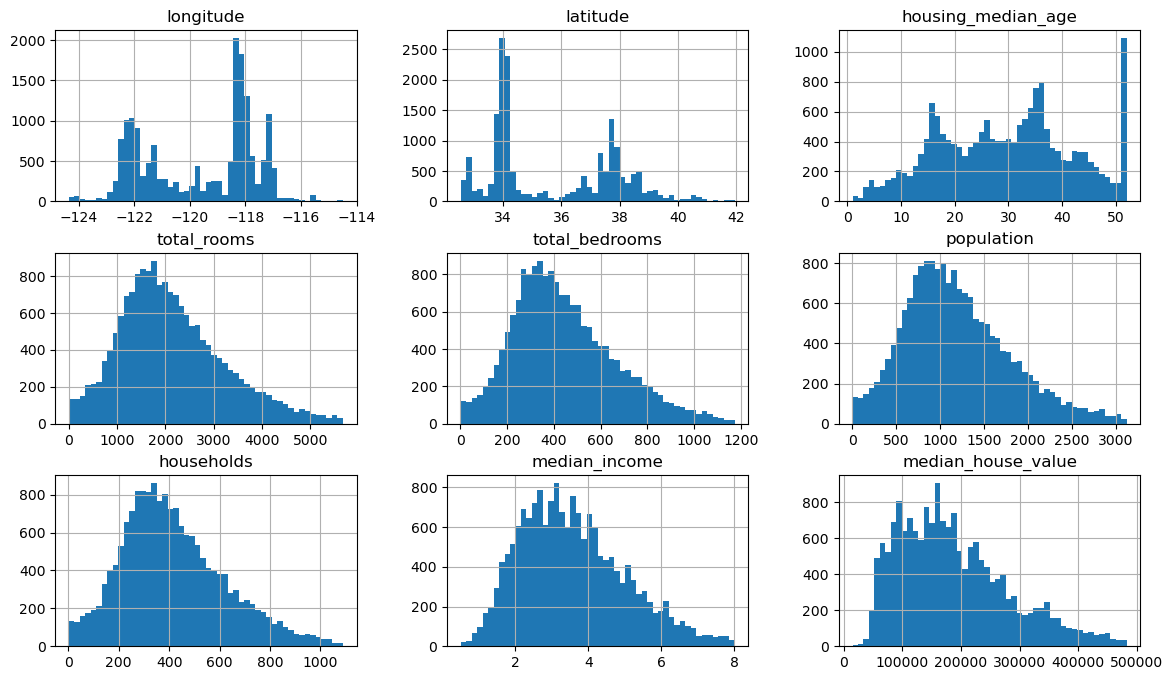

In [12]:
df1.hist(bins=50, figsize=(14,8))
plt.show

In [13]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923359,-0.086563,-0.008383,0.030220,0.114076,0.027736,-0.006539,-0.042774
latitude,-0.923359,1.000000,-0.013136,0.006215,-0.045745,-0.145887,-0.066881,-0.087015,-0.157842
housing_median_age,-0.086563,-0.013136,1.000000,-0.293529,-0.225811,-0.186084,-0.195738,-0.166390,0.098075
total_rooms,-0.008383,0.006215,-0.293529,1.000000,0.887107,0.765476,0.879373,0.277274,0.191652
total_bedrooms,0.030220,-0.045745,-0.225811,0.887107,1.000000,0.820313,0.970630,-0.029294,0.092000
population,0.114076,-0.145887,-0.186084,0.765476,0.820313,1.000000,0.861114,-0.002611,-0.011590
households,0.027736,-0.066881,-0.195738,0.879373,0.970630,0.861114,1.000000,0.012943,0.120213
median_income,-0.006539,-0.087015,-0.166390,0.277274,-0.029294,-0.002611,0.012943,1.000000,0.628973
median_house_value,-0.042774,-0.157842,0.098075,0.191652,0.092000,-0.011590,0.120213,0.628973,1.000000


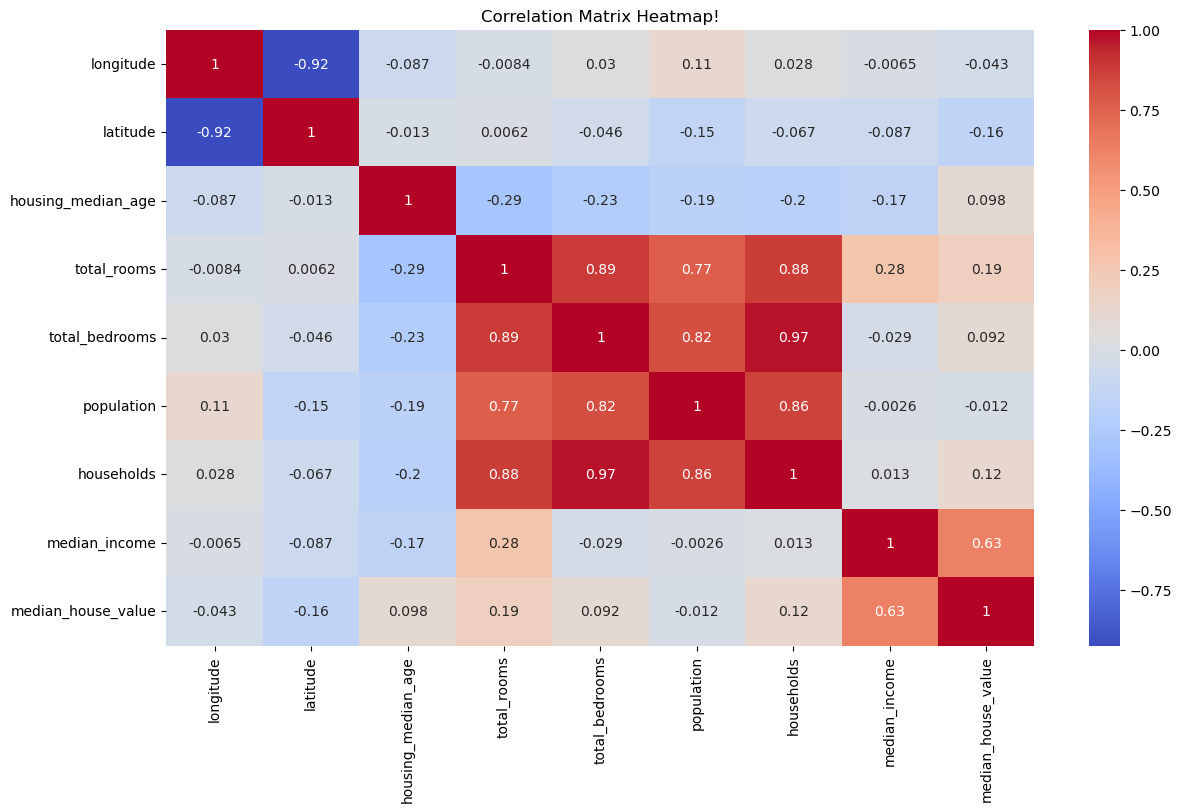

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap!")
plt.show()

In [15]:
df1.ocean_proximity.value_counts()

<1H OCEAN     7523
INLAND        5817
NEAR OCEAN    2204
NEAR BAY      1885
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
df2=pd.get_dummies(df1, columns=['ocean_proximity'], drop_first=True)
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,0,0,1,0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1,0,0,0


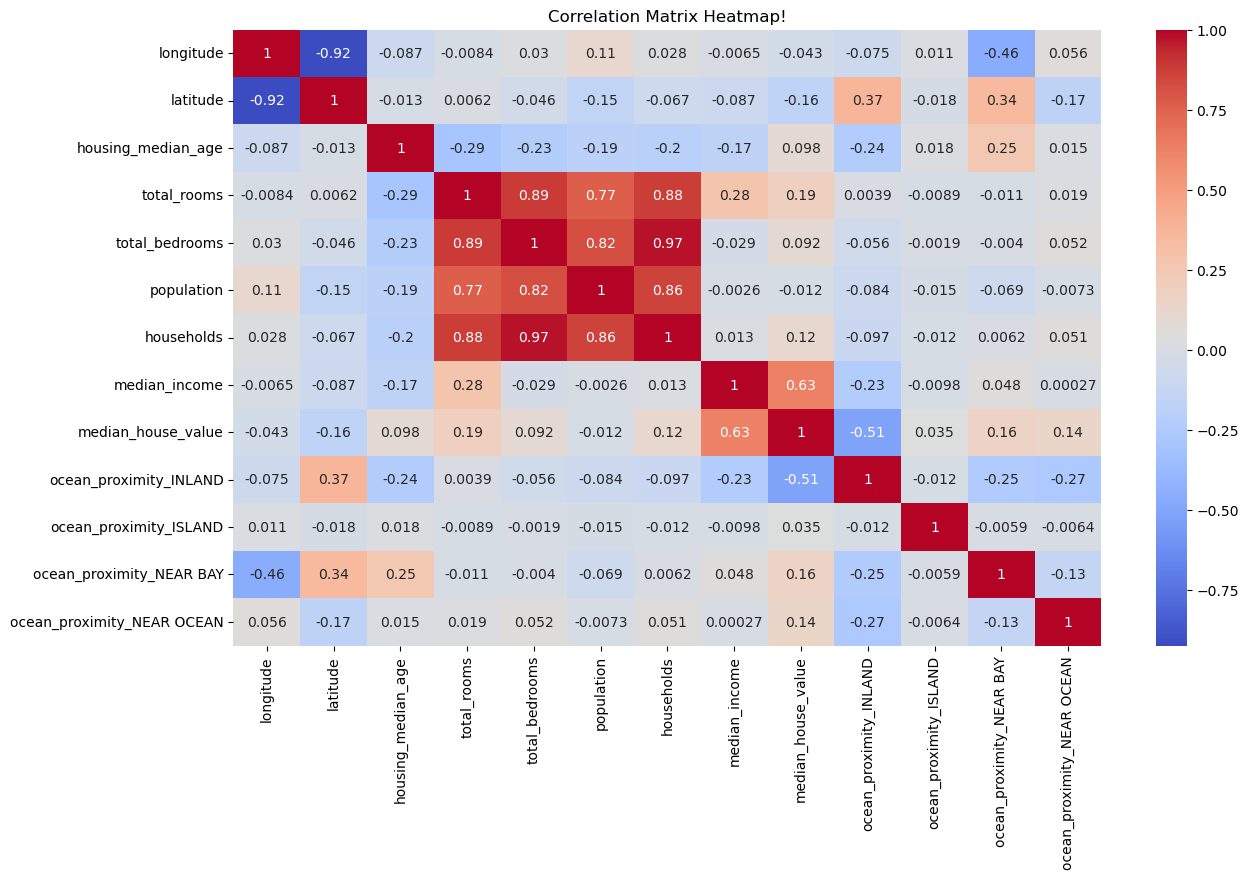

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap!")
plt.show()

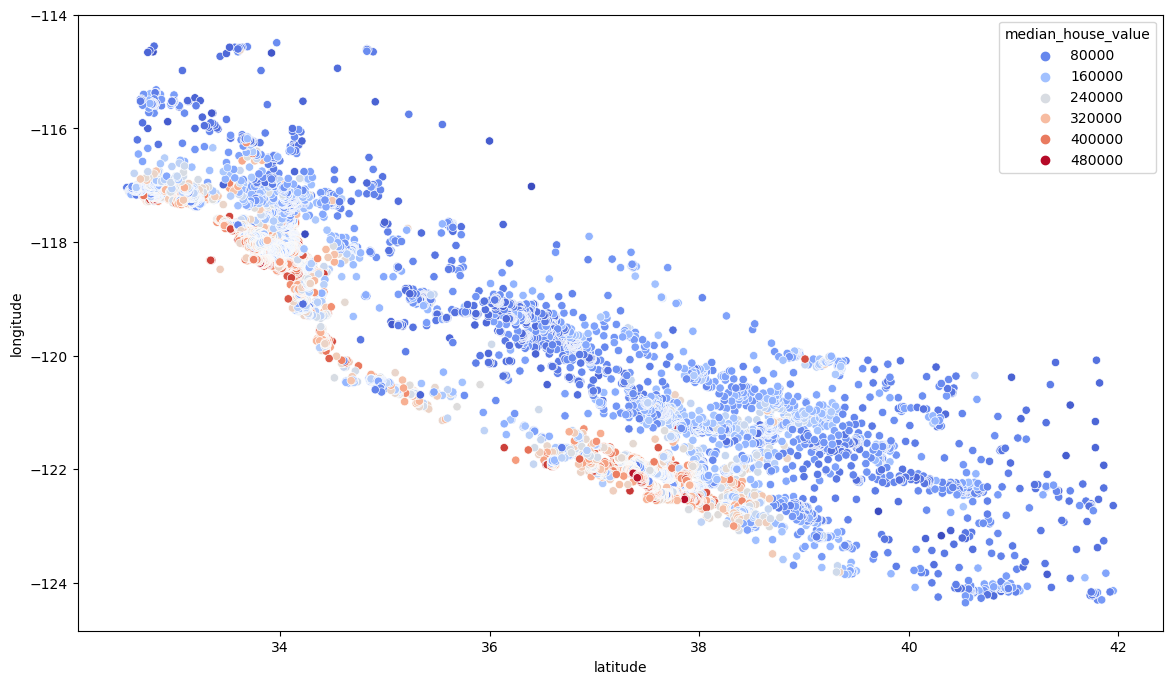

In [18]:
plt.figure(figsize=(14,8))
sns.scatterplot(x="latitude", y="longitude", data=df2, hue="median_house_value", palette="coolwarm")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                    'population', 'households', 'median_income']
std_scaler = StandardScaler()
df3 = df2.copy()
df3[columns_to_scale] = std_scaler.fit_transform(df2[columns_to_scale])

In [20]:
df3.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-1.314246,0.993339,1.843018,-0.622653,-1.154576,-1.164953,-1.167469,2.550613,352100,0,0,1,0
3,-1.319235,0.993339,1.843018,-0.799933,-0.951204,-1.061935,-0.962997,1.432289,341300,0,0,1,0
4,-1.319235,0.993339,1.843018,-0.475685,-0.747832,-1.050304,-0.768261,0.187466,342200,0,0,1,0
5,-1.319235,0.993339,1.843018,-1.126018,-1.050630,-1.302865,-1.089575,0.319507,269700,0,0,1,0
6,-1.319235,0.988723,1.843018,0.358358,0.196716,-0.171324,0.473177,0.057851,299200,0,0,1,0
7,-1.319235,0.988723,1.843018,0.881013,1.091551,-0.066643,1.120673,-0.315617,241400,0,0,1,0
8,-1.324224,0.988723,1.024291,0.376729,0.992125,0.014774,0.867517,-1.035811,226700,0,0,1,0
9,-1.319235,0.988723,1.843018,1.289768,1.181939,0.588022,1.446855,0.080088,261100,0,0,1,0
10,-1.324224,0.993339,1.843018,0.052481,-0.051849,-0.477056,-0.072082,-0.258048,281500,0,0,1,0
11,-1.324224,0.993339,1.843018,1.247514,1.385311,0.509928,1.544223,-0.211356,241800,0,0,1,0


In [21]:
X = df3.drop("median_house_value", axis=1)
y = df3["median_house_value"]

In [22]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-1.314246,0.993339,1.843018,-0.622653,-1.154576,-1.164953,-1.167469,2.550613,0,0,1,0
3,-1.319235,0.993339,1.843018,-0.799933,-0.951204,-1.061935,-0.962997,1.432289,0,0,1,0
4,-1.319235,0.993339,1.843018,-0.475685,-0.747832,-1.050304,-0.768261,0.187466,0,0,1,0
5,-1.319235,0.993339,1.843018,-1.126018,-1.050630,-1.302865,-1.089575,0.319507,0,0,1,0
6,-1.319235,0.988723,1.843018,0.358358,0.196716,-0.171324,0.473177,0.057851,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.740498,1.745680,-0.367544,-0.440780,-0.323012,-0.585059,-0.422606,-1.396117,1,0,0,0
20636,-0.800367,1.750295,-0.940653,-1.329936,-1.335351,-1.397576,-1.474178,-0.705780,1,0,0,0
20637,-0.805356,1.722602,-1.022526,0.100246,0.178639,-0.315882,0.078838,-1.299338,1,0,0,0
20638,-0.855248,1.722602,-0.940653,-0.261663,-0.164834,-0.757864,-0.330107,-1.183508,1,0,0,0


In [23]:
y

2        352100
3        341300
4        342200
5        269700
6        299200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 17434, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor model.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data.
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
rf_model.score(X_test, y_test)

0.7941664678491462

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the validation set.
y_pred = rf_model.predict(X_test)

# Calculate regression metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE.
r2 = r2_score(y_test, y_pred)

# Print the results for each error.
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 28726.408322340118
Mean Squared Error (MSE): 1792933920.7104788
Root Mean Squared Error (RMSE): 42343.05044172513
R-squared (R2) Score: 0.7941664678491462
